In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
from scipy.stats import norm    
from scipy import stats 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataFrame = pd.read_csv('KS_train_data.csv')

In [3]:
print(dataFrame.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [4]:
dataFrame.head(10)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.00,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.00,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,1332991739,MyPhoneHenge,5217.00,False,5217.00,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,1332991696,Walk-Through,7160.00,False,7160.00,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.00,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.0,...,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.00,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.0,...,1333045464,A Book of Dwarves,5429.95,False,5429.95,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.0,...,1332822807,Drawing a Drawing 365,62736.01,True,62736.01,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.0,...,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.00,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.0,...,1332851088,Arts on the Waterfront,5001.00,False,5001.00,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...


***
```
COL's VARS:

1)project_id
2)backers_count : number of supporters of the project (quantitative)
3)blurb : description of the project (qualitative)
4)category (qualitative)
5)converted_pledged_amount : funding amount ?? (quantitative). It's into integers
6)country (qualitative)
7)created_at (quantitative)
8)currency (qualitative)
9)deadline (quanatitative)
10)fx_rate : exchange rate (quantitative)
11)goal : goal of expected fundings (quantitative)
12)launched_at: (quantitative)
13)name : name of the project (qualitative)
14)pledged : funding amount ?? (quantitative). It's into floats (.00)
15)staff_pick : projects picked or not picked (Boolean -> True/False)
16)usd_pledged : funding amount in dollars ?? (quantitative). It's into floats (.00) != pledged
17)location: City, State(abbreviation)/Country 
18)funded : projects funded or not funded (Boolean -> True/False) --> MOST IMPORTANT
19)subcategory (qualitative)
20)project_url (link)
21)reward_url (link)

```
***

In [30]:
dataFrame['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

***
```
Most projects have been funded (58454) compared to (41546) not funded

```
***

<AxesSubplot:xlabel='funded', ylabel='Density'>

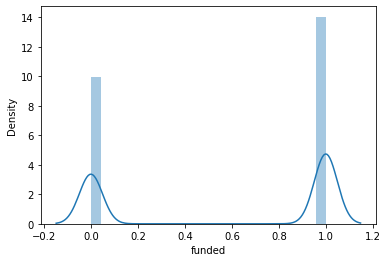

In [51]:
sns.distplot(dataFrame['funded'])

***
```

List of COL's VARS which might not be relevant:

3)blurb 
20)project_url
21)reward_url 
16)usd_pledged 

```
***

***
```

Check if the dataFrame.usd_pledged != dataFrame.pledged or equal to be eliminated --> they are different 

```
***

In [24]:
gains = dataFrame[dataFrame.usd_pledged != dataFrame.pledged]
print(gains)

      project_id  backers_count  \
997    KS_000997              4   
998    KS_000998              1   
1005   KS_001005              4   
1012   KS_001012              5   
1022   KS_001022              1   
...          ...            ...   
99976  KS_099976            187   
99981  KS_099981             97   
99984  KS_099984            128   
99990  KS_099990             59   
99999  KS_099999            145   

                                                   blurb category  \
997    "SPLASH OUT THE SOUND PROJECT"! We makes ceram...      art   
998    Tell me about your taste and i will create a p...      art   
1005   Series of artistic pieces in ceramics, inspire...      art   
1012   A gorgeously illustrated, vintage inspired cal...      art   
1022   we are creating a ceramics studio within our s...      art   
...                                                  ...      ...   
99976  Love comedy? Get involved in creating a dedica...  theater   
99981  We're an affordable 

***
```

We are going to eliminate these 3 variables as they are not usefull for the analysis 
3)blurb 
20)project_url
21)reward_url 


```
***

In [28]:
dataFrame.drop(columns=['blurb','project_url', 'reward_url'])

,project_id,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory
0,KS_000000,80,art,3596,US,1325980505,USD,1334866560,1.000000,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media
1,KS_000001,82,art,4586,US,1330926084,USD,1336440145,1.000000,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art
2,KS_000002,21,art,5217,US,1332382894,USD,1338175739,1.000000,5000.0,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture
3,KS_000003,37,art,7160,GB,1332342451,USD,1334806096,1.000000,6500.0,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art
4,KS_000004,153,art,15445,US,1328562617,USD,1335584240,1.000000,15000.0,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,theater,7595,US,1348677893,USD,1356552252,1.000000,7000.0,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy'...",7595.43,False,7595.430000,"New York, NY",True,spaces
99996,KS_099996,307,theater,27196,US,1364939099,USD,1367674009,1.000000,25000.0,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces
99997,KS_099997,143,theater,7226,US,1366078694,USD,1373738400,1.000000,5500.0,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces
99998,KS_099998,329,theater,31683,US,1372177000,USD,1376654340,1.000000,25000.0,1373568644,Save the Studio!,31683.00,False,31683.000000,"Arlington, VA",True,spaces


In [32]:
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [project_id, backers_count, blurb, category, converted_pledged_amount, country, created_at, currency, deadline, fx_rate, goal, launched_at, name, pledged, staff_pick, usd_pledged, location, funded, subcategory, project_url, reward_url]
Index: []

[0 rows x 21 columns]


There are no duplicate rows.

In [33]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

In [44]:
dataFrame = dataFrame.dropna(how='any',axis=0)

In [45]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

We removed all the rows with null v alues

<AxesSubplot:>

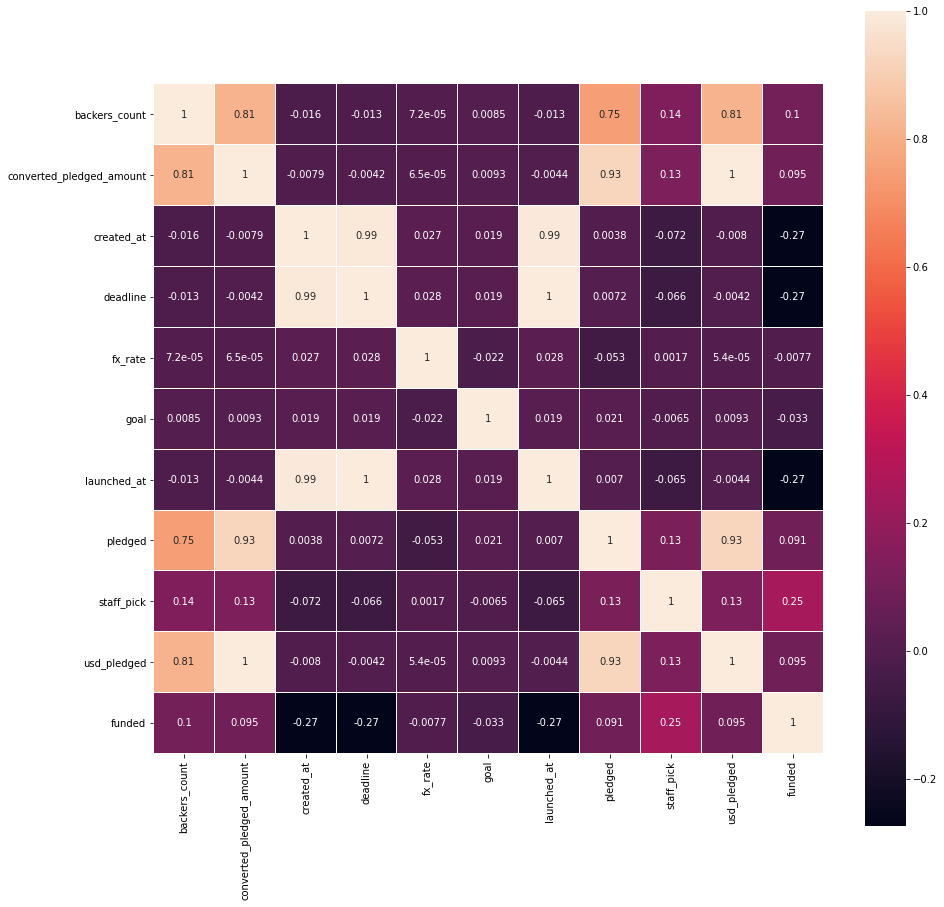

In [60]:
corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

The 10 features which most strongly correlate with <i>funded</i>

<AxesSubplot:>

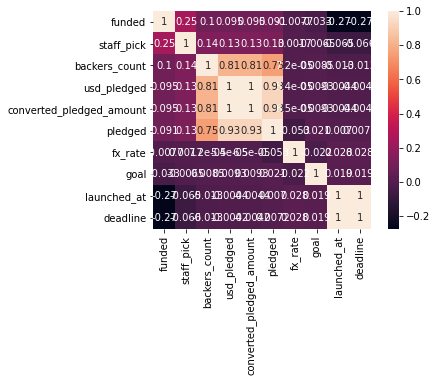

In [61]:
corrmat = dataFrame.corr()
cols = corrmat.nlargest(10, 'funded').index
sns.heatmap(corrmat.loc[cols, cols], square= True, annot = True)

The variable which correlates the most with funded is staff_pick. It is followed by backers_count and all the money-rellated variables. The least correlated ones are the time-frame-related ones, like launched_at and deadline

Check if all the values of the most relevant columns are consistent with each other

In [64]:
np.issubdtype(dataFrame['usd_pledged'].dtype, np.number)

True

In [65]:
np.issubdtype(dataFrame['backers_count'].dtype, np.number)

True

In [70]:
np.issubdtype(dataFrame['staff_pick'].dtype, np.bool)

True

In [72]:
np.issubdtype(dataFrame['funded'].dtype, np.bool)

True

There are no typos

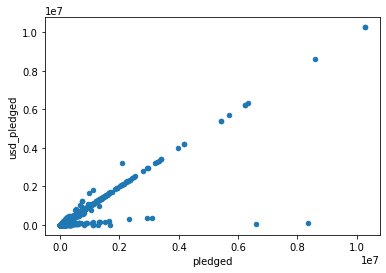

In [81]:
ax = dataFrame.plot.scatter(x = "pledged", y = "usd_pledged")

Print the data of the 2 outliers in the bottom right corner to analyze them 

In [89]:
dataFrame[dataFrame.pledged > 0.6 and dataFrame.usd_pledged < 0.2]

TypeError: '(0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: pledged, Length: 99995, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: usd_pledged, Length: 99995, dtype: bool)' is an invalid key

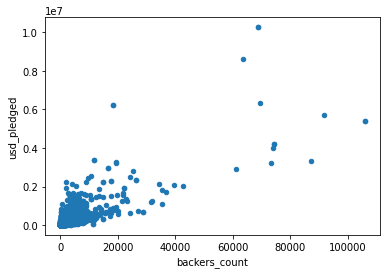

In [82]:
ax = dataFrame.plot.scatter(x = "backers_count", y = "usd_pledged")